<a href="https://colab.research.google.com/github/katherymbr/katherymbr-ML-TP1--Cuarteto-de-Anscombe/blob/main/ML_Pr%C3%A1ctico_1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

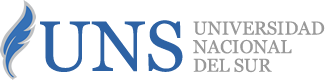



#PRÁCTICO NRO.1. APRENDIZAJE DE MÁQUINAS (ML)


##**Cuarteto de Anscombe**


*NOMBRE: Katherym Bambague Ruíz*  


```

```



**OBJETIVO**: Supongamos que tenemos cuatro nuevos datos ([16,8]; [8,6]; [16,10] y [16,6]) y sabemos que cada uno corresponde a un único dataset. Sin embargo, los parámetros estadísticos de los cuatro datasets son idénticos.
¿Cómo determinar entonces a qué dataset corresponde cada punto?

In [16]:
#IMPORTO LAS LIBRERIAS
from re import A
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.io.pytables import DataCol
from sklearn.linear_model import LinearRegression


In [17]:
# IMPRIMO Y MUESTRO EL DATASET COMPLETO (A,B,C,D)

df= pd.read_csv('/content/dataset_anscombe5.csv',  sep=';')  #DataFrame
df

,dataset,x1,y1
0,A,10.0,8.04
1,A,8.0,6.95
2,A,13.0,7.58
3,A,9.0,8.81
4,A,11.0,8.33
5,A,14.0,9.96
6,A,6.0,7.24
7,A,4.0,4.26
8,A,12.0,10.84
9,A,7.0,4.82


In [18]:
#Imprimo los primeros 5 campos del archivodataset
df.head()

,dataset,x1,y1
0,A,10.0,8.04
1,A,8.0,6.95
2,A,13.0,7.58
3,A,9.0,8.81
4,A,11.0,8.33


In [19]:
#imprimo los ulltimos datos deldataset
df.tail()

,dataset,x1,y1
39,D,8.0,5.25
40,D,19.0,12.50
41,D,8.0,5.56
42,D,8.0,7.91
43,D,8.0,6.89


OBTENGO LOS 4 DATASET POR SEPARADO

#1. DATASET_A

,dataset,x1,y1
0,A,10.0,8.04
1,A,8.0,6.95
2,A,13.0,7.58
3,A,9.0,8.81
4,A,11.0,8.33
5,A,14.0,9.96
6,A,6.0,7.24
7,A,4.0,4.26
8,A,12.0,10.84
9,A,7.0,4.82


'Valor de R2='

0.6665424595087748

'Valor de pendiente, M'

array([0.50009091])

,x1,y1
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


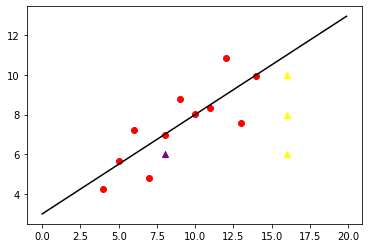

In [20]:
# 1. DATASET A 

data_A=df[df['dataset']=="A"] #solo muestro el dataset  con registro A

# grafico  DATASET A
data_A['x1']
data_A['y1']
display(data_A)

# Regresión lineal del DATASET_A
x=np.array((data_A['x1'])).reshape(-1,1)
y=np.array((data_A['y1']))
reg = LinearRegression().fit(x,y)
reg.score(x, y)
display('Valor de R2=', reg.score(x,y))
display('Valor de pendiente, M', reg.coef_)
x_data=np.arange(0,20,0.1).reshape(-1,1)
y_data_A=reg.predict(x_data)

# grafica de regresión lineal
plt.plot(x_data, y_data_A, c='black')  # grafica la linea de tendencia de la regresión lineal
plt.scatter(data_A['x1'],data_A['y1'], c='red')  # grafica los puntos del dataset_A

#grafico los puntos a evaluar
plt.scatter(16,8, c='yellow',  marker='^')
plt.scatter(8,6, c='purple',  marker='^' )
plt.scatter(16,10, c='yellow',  marker='^' )
plt.scatter(16,6, c='yellow',  marker='^')

# Valores estadisticos de dataset A

estadistica_A= data_A. describe()
estadistica_A



#ANÁLISIS DATASET_A:
Los puntos de este dataset se encuentran muy dispersos, por lo cual es dificil concluir, pero al realizar el analisis estadistico podemos observar que los puntos tienden difusamente a una linea recta. Se le denomina difusamnete, ya que el estadistico R2, tiene el valor de 0.66, valor ligeramente alejado del valor 1, por lo cual esta recta no se ajusta del todo a la tendencia de los puntos. Considerando esta tendencia, es problable que por lo menos 3 de los 4 puntos, pertenezcan a esta grafica: (8,6),(16,10) y (16,8), pero esta duda la podemos resolver por la regresión lineal y despues de analizar los tres dataset restantes. Con el análisis total de los datasets se concluye que el punto (16,6), es el que mas se acopla a la tendencia de la grafica, Los puntos restantes se descartan ya que se clasificaron adecaudamente el los datasets restantes

#2. DATASET_B

,dataset,x1,y1
11,B,10.0,9.14
12,B,8.0,8.14
13,B,13.0,8.74
14,B,9.0,8.77
15,B,11.0,9.26
16,B,14.0,8.10
17,B,6.0,6.13
18,B,4.0,3.10
19,B,12.0,9.13
20,B,7.0,7.26


'Valor de R2='

0.6662420337274844

'Valor de pendiente, M'

array([0.5])

,x1,y1
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


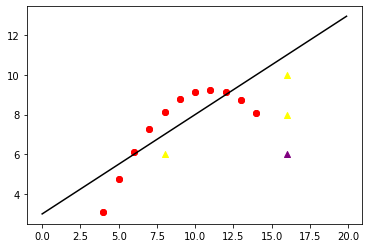

In [21]:
#  DATASET B 

data_B=df[df['dataset']=="B"] #solo muestro el dataset  con registro B

# grafico  DATASET B
data_B['x1']
data_B['y1']
display(data_B)
plt.scatter(data_B['x1'],data_B['y1'], c='red')

# Regresión lineal del DATASET_B
x=np.array((data_B['x1'])).reshape(-1,1)
y=np.array((data_B['y1']))
reg = LinearRegression().fit(x,y)
reg.score(x, y)
display('Valor de R2=', reg.score(x,y))
display('Valor de pendiente, M', reg.coef_)
x_data=np.arange(0,20,0.1).reshape(-1,1)
y_data_B=reg.predict(x_data)

# grafica de regresión lineal
plt.plot(x_data, y_data_B, c='black')  # grafica la linea de tendencia de la regresión lineal
plt.scatter(data_B['x1'],data_B['y1'], c='red')  # grafica los puntos del dataset_A

#grafico los puntos a evaluar
plt.scatter(16,8, c='yellow',  marker='^')
plt.scatter(8,6, c='yellow',  marker='^' )
plt.scatter(16,10, c='yellow',  marker='^' )
plt.scatter(16,6, c='purple',  marker='^')

#obtengo los valores estadisticos de dataset B
estadistica_B= data_B. describe()
display(estadistica_B)





#ANÁLISIS DATASET_B: 
La gráfica muestra que los datos tienen una tendencia exponencial, aqui el coeficiente de correlación de Pearson R2 no es relevante, porque la relación entre los datos no es lineal, por lo cual el punto que más se ajusta a este comportamiento exponencial es el (16,6), los demás estan fuera de la tendencia. podemos observar tambien que en los valores estadisticos de los dataset (Me,std, pendiente y R2) son los mismos.

# 3. DATASET_C

,dataset,x1,y1
22,C,10.0,7.46
23,C,8.0,6.77
24,C,13.0,12.74
25,C,9.0,7.11
26,C,11.0,7.81
27,C,14.0,8.84
28,C,6.0,6.08
29,C,4.0,5.39
30,C,12.0,8.15
31,C,7.0,6.42


'Valor de R2='

0.6663240410665592

'Valor de pendiente, M'

array([0.49972727])

'estadistica'

,x1,y1
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


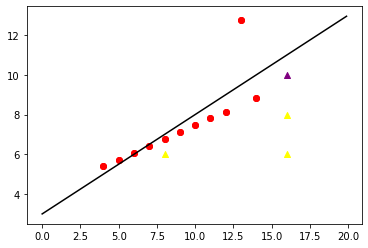

In [22]:
# 3. DATASET C 

data_C=df[df['dataset']=="C"] #solo muestro el dataset  con registro C

# grafico  DATASET C
data_C['x1']
data_C['y1']
display(data_C)
plt.scatter(data_C['x1'],data_C['y1'], c='red')  # grafica los puntos del dataset_A


# Regresión lineal del DATASET_C
x=np.array((data_C['x1'])).reshape(-1,1)
y=np.array((data_C['y1']))
reg = LinearRegression().fit(x,y)
reg.score(x, y)
display('Valor de R2=', reg.score(x,y))
display('Valor de pendiente, M', reg.coef_)
x_data=np.arange(0,20,0.1).reshape(-1,1)
y_data_C=reg.predict(x_data)

# grafica de regresión lineal
plt.plot(x_data, y_data_C, c='black')  # grafica la linea de tendencia de la regresión lineal
plt.scatter(data_C['x1'],data_C['y1'], c='red')  # grafica los puntos del dataset_A


#grafico los puntos a evaluar
plt.scatter(16,8, c='yellow',  marker='^')
plt.scatter(8,6, c='yellow',  marker='^' )
plt.scatter(16,10, c='purple',  marker='^' )
plt.scatter(16,6, c='yellow',  marker='^')


#obtengo los valores estadisticos de dataset C
estadistica_C= data_C. describe()
display('estadistica', estadistica_C)



#ANÁLISIS DATASET_3:

En esta gráfica la tendencia de los puntos es una relación lineal, que se ve levemente afectada  por una pareja de puntos del dataset_C que se encuentra ubicada en el extremo de la gráfica (13;12,74), lo que  influye lo suficiente como para alterar la línea de regresión hacia arriba y disminuir el coeficiente de correlación R2 de 1 a 0.66. Para este dataset, el dato que pertenece a esa grafica es el (16, 10), ya que hace disminuir ligeramnete la inclinación de la linea de regresión, ajustandose a esta y permitiendo que el valor de R2, se acerque mas a 1.


# 4. DATASET_D

,dataset,x1,y1
33,D,8.0,6.58
34,D,8.0,5.76
35,D,8.0,7.71
36,D,8.0,8.84
37,D,8.0,8.47
38,D,8.0,7.04
39,D,8.0,5.25
40,D,19.0,12.50
41,D,8.0,5.56
42,D,8.0,7.91


'Valor de R2='

0.6667072568984653

'Valor de pendiente, M'

array([0.49990909])

,x1,y1
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


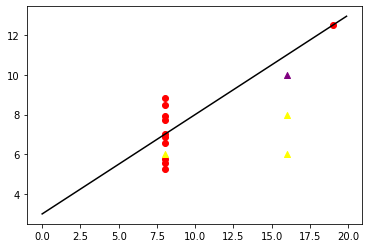

In [23]:
# 3. DATASET D

data_D=df[df['dataset']=="D"] #solo muestro el dataset  con registro D

# grafico  DATASET D
data_D['x1']
data_D['y1']
display(data_D)

# Regresión lineal del DATASET_D
x=np.array((data_D['x1'])).reshape(-1,1)
y=np.array((data_D['y1']))
reg = LinearRegression().fit(x,y)
reg.score(x, y)
display('Valor de R2=', reg.score(x,y))
display('Valor de pendiente, M', reg.coef_)
x_data=np.arange(0,20,0.1).reshape(-1,1)
y_data_D=reg.predict(x_data)

# grafica de regresión lineal
plt.plot(x_data, y_data_D, c='black')  # grafica la linea de tendencia de la regresión lineal
plt.scatter(data_D['x1'],data_D['y1'], c='red')  # grafica los puntos del dataset_D

#grafico los puntos a evaluar
plt.scatter(16,8, c='yellow',  marker='^')
plt.scatter(8,6, c='yellow',  marker='^' )
plt.scatter(16,10, c='purple',  marker='^' )
plt.scatter(16,6, c='yellow',  marker='^')


#obtengo los valores estadisticos de dataset D
estadistica_D= data_D. describe()
estadistica_D


#ANÁLISIS DATASET_4:
En esta gráfica se observa que un valor atípico es suficiente para producir un coeficiente de correlación alto (R2=0,66), incluso cuando la relación entre las dos variables no es lineal, por lo cual hay dos puntos que se pueden ajustar a esta grafica (8,6) y (16,10), siendo el punto (8,6), el que mas se aproxima a la linea de ajuste

#CONCLUSIÓN PRÁCTICO No. 1
El cuarteto de Ansombe, refleja una situación muy importante en el manejo de los datos y análisis de resultados, porque cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, tienen representaciónes gráficas diferentes. ESte aspecto nos hace comprender algo que en algunas ocasiones puede obiarse, y es que no solo se trata de analizar los valores numéricos de un dataset, si no que tambien es necesario graficarlos, observar la tendencia, información que nos puede suministrar y comprender la naturaleza de los datos con los que estamos trabajando.

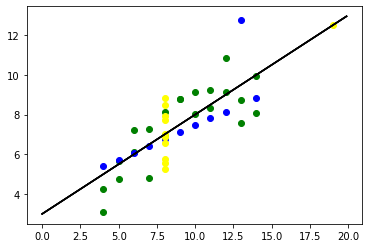

In [28]:
plt.scatter(data_A['x1'],data_A['y1'], c='green')
plt.plot(x_data, y_data_A, c='black') 
plt.scatter(data_B['x1'],data_B['y1'], c='green')
plt.plot(x_data, y_data_B, c='black') 
plt.scatter(data_C['x1'],data_C['y1'], c='blue')
plt.plot(x_data, y_data_C, c='black') 
plt.scatter(data_D['x1'],data_D['y1'], c='yellow')
plt.plot(x_data, y_data_D, c='black') 